# ***`Transfer learning `***

### ***`Packages & Modules `***

In [1]:
#Import Packages & Modules

import numpy as np
import tensorflow as tf
from tensorflow import keras

```
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. 
For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.
```


```
The Workflow :
1.  Take layers from a previously trained model.
2.  Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3.  Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4.  Train the new layers on your dataset.
```

### ***`Freezing layers : Understanding the Trainable Attribute `***

```
Layers & models have three weight attributes:

*   weights is the list of all weights variables of the layer.
*   trainable_weights is the list of those that are meant to be updated (via gradient descent) to minimize the loss during training.
*   non_trainable_weights is the list of those that aren't meant to be trained. Typically they are updated by the model during the forward pass.
```



The Dense layer has 2 trainable weights (kernel & bias)



In [2]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0


```
In general, all weights are trainable weights. 
The only built-in layer that has non-trainable weights is the BatchNormalization layer. 
It uses non-trainable weights to keep track of the mean and variance of its inputs during training. 
```



The BatchNormalization layer has 2 trainable weights and 2 non-trainable weights

In [3]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 4
trainable_weights: 2
non_trainable_weights: 2


```
Layers & models also feature a boolean attribute trainable.
Its value can be changed. 
Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. 
--> This is called "freezing" the layer: the state of a frozen layer won't be updated during training 
(either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).
```



Setting Trainable to False

In [4]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights
layer.trainable = False  # Freeze the layer

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 0
non_trainable_weights: 2


```
When a trainable weight becomes non-trainable, its value is no longer updated during training.
```



In [5]:
#Make a model with 2 layers
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Keep a copy of the weights of layer1 for later reference
initial_layer1_weights_values = layer1.get_weights()
# Keep a copy of the weights of layer2 for later reference
initial_layer2_weights_values = layer2.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(initial_layer1_weights_values[0], final_layer1_weights_values[0])
np.testing.assert_allclose(initial_layer1_weights_values[1], final_layer1_weights_values[1])

# Check that the weights of layer2 have not changed during training
final_layer2_weights_values = layer2.get_weights()


print("Layer1")
print("weights:", len(layer1.weights))
print("trainable_weights:", len(layer1.trainable_weights))
print("non_trainable_weights:", len(layer1.non_trainable_weights))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Initial Layer 0 :\n ", (initial_layer1_weights_values[0]))
print("Final Layer 0 :\n ", (final_layer1_weights_values[0]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Initial Layer 1 :\n ", (initial_layer1_weights_values[1]))
print("Final Layer 1 :\n ", (final_layer1_weights_values[1]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Layer2")
print("weights:", len(layer2.weights))
print("trainable_weights:", len(layer2.trainable_weights))
print("non_trainable_weights:", len(layer2.non_trainable_weights))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Initial Layer 0 :\n ", (initial_layer2_weights_values[0]))
print("Final Layer 0 :\n ", (final_layer2_weights_values[0]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Initial Layer 1 :\n ", (initial_layer2_weights_values[1]))
print("Final Layer 1 :\n ", (final_layer2_weights_values[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.0345
Layer1
weights: 2
trainable_weights: 0
non_trainable_weights: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Layer 0 :
  [[-0.861712    0.27137923 -0.54208136]
 [ 0.5620065   0.5547235   0.26138473]
 [ 0.3717544  -0.64063334  0.727664  ]]
Final Layer 0 :
  [[-0.861712    0.27137923 -0.54208136]
 [ 0.5620065   0.5547235   0.26138473]
 [ 0.3717544  -0.64063334  0.727664  ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Layer 1 :
  [0. 0. 0.]
Final Layer 1 :
  [0. 0. 0.]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer2
weights: 2
trainable_weights: 2
non_trainable_weights: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Layer 0 :
  [[ 0.48008108 -0.61894417  0.66807055]
 [-0.6965356  -0.7934258   0.02045465]
 [-0.5127063  -0.79722667 -0.79281116]]
Final Layer 0 :
  [[ 0.47908553 -0.617946    0.6690699 ]
 [-0.6975292  -0.79242843  0.02145367]
 [-0.5137026  -0.798226   -0.7918116 ]]
~~~~

### ***`Recursive Setting of the Trainable Attribute `***

```
If you set trainable = False on a model or on any layer that has sublayers, all children layers become non-trainable as well.
```



In [6]:
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

model.trainable = False  # Freeze the outer model

assert inner_model.trainable == False  # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively

### ***`The Typical Transfer-Learning Workflow `***

```
The workflow (Implementation in Keras)
1.   Instantiate a base model and load pre-trained weights into it.
2.   Freeze all layers in the base model by setting trainable = False.
3.   Create a new model on top of the output of one (or several) layers from the base model.
4.   Train your new model on your new dataset.

An alternative
1.   Instantiate a base model and load pre-trained weights into it.
2.   Run the new dataset through it and record the output of one (or several) layers from the base model. This is called feature extraction.
3.   Use that output as input data for a new, smaller model.

--> A key advantage of that second workflow is that you only run the base model once on your data, rather than once per epoch of training. So it's a lot faster & cheaper.
```



In [7]:
#First, instantiate a base model with pre-trained weights.
    ##  Load weights pre-trained on ImageNet.
base_model = keras.applications.Xception(weights='imagenet', input_shape=(150, 150, 3),include_top=False)  
    ## Do not include the ImageNet classifier at the top.

In [8]:
#Then, freeze the base model.
base_model.trainable = False

In [9]:
#Create a new model on top.
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
    # A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [10]:
#Train the model on new data.
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])
#model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

### ***`Fine-Tuning `***

In [11]:
#This is how to implement fine-tuning of the whole base model:

    # Unfreeze the base model
base_model.trainable = True

    # It's important to recompile your model after you make any changes to the `trainable` attribute of any inner layer, so that your changes are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=[keras.metrics.BinaryAccuracy()])

    # Train end-to-end. Be careful to stop before you overfit!
#model.fit(new_dataset, epochs=10, callbacks=..., validation_data=...)

### ***`Transfer Learning & Fine-Tuning with a Custom Training Loop `***

In [32]:
#Applying gradient update

# Create base model
base_model = keras.applications.Xception(weights='imagenet',input_shape=(150, 150, 3),include_top=False)

# Freeze base model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()

# Iterate over the batches of a dataset
for inputs, targets in new_dataset:
    # Open a GradientTape
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(inputs)
        # Compute the loss value for this batch
        loss_value = loss_fn(targets, predictions)

    # Get gradients of loss wrt the *trainable* weights
    gradients = tape.gradient(loss_value, model.trainable_weights)
    # Update the weights of the model
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

## ***`An end-to-end Example: Fine-Tuning an Image Classification Model on a Cats vs. Dogs Dataset`***

```
Load the Xception model, pre-trained on ImageNet, and use it on the Kaggle "cats vs. dogs" classification dataset.
```



### ***`Getting the Data`***




```
Transfer learning is most useful when working with very small datasets.
To keep the dataset small, we will use 40% of the original training data (25 000 images) for training, 10% for validation, and 10% for testing.
```



In [12]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load("cats_vs_dogs", split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"], as_supervised=True)

print("\n \n")
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))


 

Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


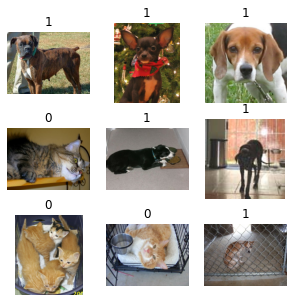

In [13]:
#Display Images
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

    #These are the first 9 images in the training dataset -- they're all different sizes.
    #The label 1 --> "dog" 
    #The label 0 --> "cat"

### ***`Standardizing the Data`***


```
The raw images have a variety of sizes.
In addition, each pixel consists of 3 integer values between 0 and 255 (RGB level values). 
This isn't a great fit for feeding a neural network. We need to do 2 things:
*  Standardize to a fixed image size. We pick 150x150.
*  Normalize pixel values between -1 and 1. We'll do this using a Normalization layer as part of the model itself.
```



In [15]:
#Resize images to 150x150
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [16]:
#Batch the data and use caching & prefetching to optimize loading speed
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

### ***`Using Random Data Augmentation`***


```
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, 
such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.
```



In [17]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

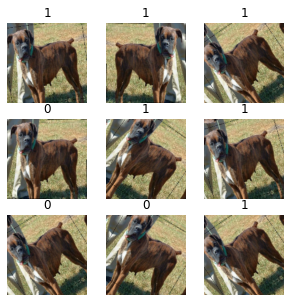

In [18]:
#Display Images after various Random Transformations

import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(5, 5))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[i]))
        plt.axis("off")

### ***`Build a Model`***




```
Note that:
*  We add a Normalization layer to scale input values (initially in the [0, 255] range) to the [-1, 1] range.
*  We add a Dropout layer before the classification layer, for regularization.
*  We make sure to pass training=False when calling the base model, so that it runs in inference mode, so that batchnorm statistics don't get updated even after we unfreeze the base model for fine-tuning.
```



In [19]:
# Load weights pre-trained on ImageNet.
base_model = keras.applications.Xception(weights="imagenet",  input_shape=(150, 150, 3),include_top=False,)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized from (0, 255) to a range (-1., +1.), the normalization layer does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode when we unfreeze the base model for fine-tuning, so we make sure that the base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

### ***`Train the Top Layer`***


In [20]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

epochs = 20
history_1=model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - 25s 86ms/step - loss: 0.1654 - binary_accuracy: 0.9280 - val_loss: 0.0933 - val_binary_accuracy: 0.9678
Epoch 2/20
291/291 [==============================] - 24s 82ms/step - loss: 0.1207 - binary_accuracy: 0.9509 - val_loss: 0.0783 - val_binary_accuracy: 0.9725
Epoch 3/20
291/291 [==============================] - 23s 80ms/step - loss: 0.1135 - binary_accuracy: 0.9538 - val_loss: 0.0812 - val_binary_accuracy: 0.9712
Epoch 4/20
291/291 [==============================] - 23s 80ms/step - loss: 0.1122 - binary_accuracy: 0.9527 - val_loss: 0.0813 - val_binary_accuracy: 0.9703
Epoch 5/20
291/291 [==============================] - 24s 81ms/step - loss: 0.1063 - binary_accuracy: 0.9548 - val_loss: 0.0863 - val_binary_accuracy: 0.9690
Epoch 6/20
291/291 [==============================] - 24s 81ms/step - loss: 0.1024 - binary_accuracy: 0.9560 - val_loss: 0.0828 - val_binary_accuracy: 0.9708
Epoch 7/20
291/291 [==============================] 



```
--> Accuracy = 0.9721
```



### ***`Do a round of fine-tuning of the entire model`***


In [34]:
#Unfreeze the base_model. 
    ##Note that it keeps running in inference mode since we passed `training=False` when calling it. This means that the batchnorm layers will not update their batch statistics.
    ## This prevents the batchnorm layers from undoing all the training we've done so far.
base_model.trainable = True
model.summary()
    ## Low learning rate
model.compile(optimizer=keras.optimizers.Adam(1e-5),  loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=[keras.metrics.BinaryAccuracy()])

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

291/291 [==============================] - 92s 317ms/step - loss: 0.0812 - binary_accuracy: 0.9686 - val_loss: 0.0534 - val_binary_accuracy: 0.9776
Epoch 2/10
291/291 [==============================] - 91s 313ms/step - loss: 0.0540 - binary_accuracy: 0.9779 - val_loss: 0.0495 - val_binary_accuracy: 0.9789
Epoch 3/10
291/291 [==============================] - 91s 313ms/step - loss: 0.0499 - binary_accuracy: 0.9783 - val_loss: 0.0613 - val_binary_accuracy: 0.9781
Epoch 4/10
291/291 [==============================] - 91s 312ms/step - loss: 0.0388 - binary_accuracy: 0.9847 - val_loss: 0.0499 - val_binary_accuracy: 0.9819
Epoch 5/10
291/291 [==============================] - 91s 313ms/step - loss: 0.0317 - binary_accuracy: 0.9876 - val_loss: 0.0471 - val_binary_accuracy: 0.9811
Epoch 6/10
291/291 [==============================] - 91s 313ms/step - loss: 0.0242 - binary_accuracy: 0.9910 - val_loss: 0.0502 - val_binary_accuracy: 0.9807
Epoch 7/10
291/291 [==============================] - 91s



```
--> Accuracy = 0.9802
```

